<font size="+3"><strong>Visualizing Data: Matplotlib</strong></font>

There are many ways to interact with data, and one of the most powerful modes of interaction is through **visualizations**. Visualizations show data graphically, and are useful for exploring, analyzing, and presenting datasets. We use four libraries for making visualizations: [pandas](../%40textbook/07-visualization-pandas.ipynb), Matplotlib, [plotly express](../%40textbook/08-visualization-plotly.ipynb), and [seaborn](../%40textbook/09-visualization-seaborn.ipynb). In this section, we'll focus on using Matplotlib.

# Boxplots

A **boxplot** is a graph that shows the minimum, first quartile, median, third quartile, and the maximum values in a dataset. Boxplots are useful, as they provide a visual summary of the data enabling researchers to quickly identify mean values, the dispersion of the data set, and signs of skewness.

Let's create a boxplot using the `"area_m2"` data from `colombia-real-estate-1`.
Note that the `usecols` argument allow us to only read in the columns we want, in this case `"area_m2"`.

Text(0.5, 1.0, 'Area in Square Meters')

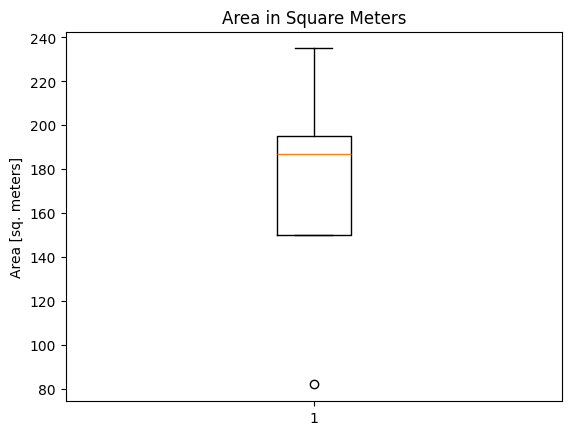

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../data/mexico-city-real-estate-1.csv", usecols = ["area_m2"])
df
plt.boxplot(df["area_m2"])
plt.ylabel("Area [sq. meters]")
plt.title("Area in Square Meters")

Here's how to interpret a boxplot. A boxplot always contains a box with two lines above and below it. Those lines are called **whiskers**, and the ends of those lines represent the upper and lower bounds of the dataset. There are also some values above the top whisker, but we'll come back to them a little later. In the meantime, notice that the plot divides the data into four sections: 

- the bottom of the lower whisker to the bottom of the box, 
- the bottom of the box to the line in the middle, 
- the middle line to the top line of the box, and 
- the top of the box to the end of the upper whisker. 

These sections are called **intervals**, and the three lines that divide them are called **quartiles**. Each interval contains 25% of the observations in the dataset, which means that the box created by the first and third quartiles represents the middle 50% of observations. The second quartile — the orange line on our graph — represents the dataset's median value. 

Keeping all that in mind, the boxplot here shows that while there are some very large properties in our Colombia dataset, half the properties tend to be much smaller. Remember those data points above the top whisker? Those are called **outliers**, and they represent values so extreme that they fall outside the meaningful spread of observations in the dataset. Since half of our properties are small — one-bedroom apartments, say — we don't really need to pay attention to eighty-room mansions nestled in the middle of thousand-acre estates. Not for this project anyway. Part of the purpose of making a boxplot is to find those outliers and discard them from future analyses.

# Histograms

A **histogram** is a graph that shows the frequency distribution of numerical data. In addition to helping us understand frequency, histograms are also useful for detecting outliers.

Let's create a histogram using the `"area_m2"` data from `colombia-real-estate-1`.

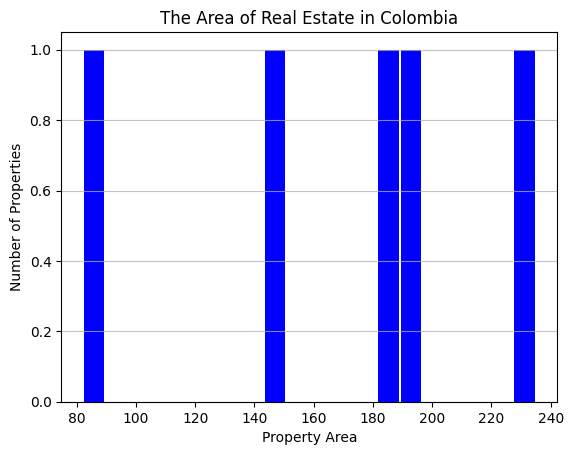

In [11]:
df = pd.read_csv("../data/mexico-city-real-estate-1.csv", usecols=["area_m2"])
# Notice that we changed `bins` from 10 to 20
plt.hist(df, bins=20, rwidth=0.9, color="b")
plt.title("The Area of Real Estate in Colombia")
plt.xlabel("Property Area")
plt.ylabel("Number of Properties")
plt.grid(axis="y", alpha=0.75);

# Bar Charts

A **bar chart** is a graph that shows all the values of a categorical variable in a dataset. They consist of an axis and a series of labeled horizontal or vertical bars. The bars depict frequencies of different values of a variable or simply the different values themselves. The numbers on the y-axis of a vertical bar chart or the x-axis of a horizontal bar chart are called the scale.

Let's make a bar chart showing the number of properties in each borough, using the `mexico-city-real-estate-1` dataset. First, let's pull out the values in the `borough` variable.

In [24]:
mexico_city1 = pd.read_csv("../data/mexico-city-real-estate-3.csv")
print(mexico_city1)
new_columns = ["empty1", "country", "city", "borough", "empty2"]
mexico_city1[new_columns] = mexico_city1["place_with_parent_names"].str.split(
    "|", n = 4, expand=True
)
mexico_city1 = mexico_city1.drop(["empty1", "empty2"], axis=1)

by_borough = mexico_city1["borough"].value_counts()
by_borough

  operation property_type                   place_with_parent_names  \
0      sell     apartment  |México|Distrito Federal|Álvaro Obregón|   
1      sell     apartment   |México|Distrito Federal|Benito Juárez|   
2      sell     apartment      |México|Distrito Federal|Cuauhtémoc|   
3      sell     apartment      |México|Distrito Federal|Cuauhtémoc|   
4      sell     apartment  |México|Distrito Federal|Álvaro Obregón|   
5      sell     apartment  |México|Distrito Federal|Álvaro Obregón|   

        price currency  price_aprox_local_currency  price_aprox_usd  
0  35000000.0      MXN                 35634500.02       1894595.53  
1   2000000.0      MXN                  2036257.11        108262.60  
2   2700000.0      MXN                  2748947.10        146154.51  
3    347000.0      MXN                  6462061.92        343571.36  
4   6870000.0      MXN                  6994543.16        371882.03  
5   6500000.0      MXN                  6617835.61        351853.45  


borough
Álvaro Obregón    3
Cuauhtémoc        2
Benito Juárez     1
Name: count, dtype: int64

([0, 1, 2],
 [Text(0, 0, 'Álvaro Obregón'),
  Text(1, 0, 'Cuauhtémoc'),
  Text(2, 0, 'Benito Juárez')])

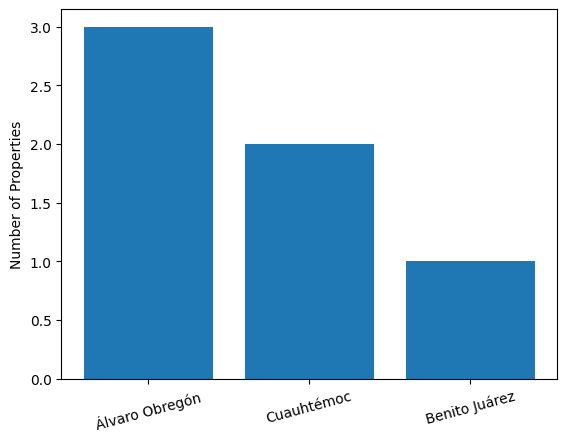

In [27]:
plt.bar(x=by_borough.index, height = by_borough.values)
plt.ylabel("Number of Properties")
plt.xticks(rotation = 15)

# Scatter Plots
A **scatter plot** is a graph that uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables, and are especially useful if you're looking for **correlations**.

Let's create a simple scatter plot using the `"area_m2"` data from `colombia-real-estate-3`. Note that we use the `usecols` argument below to import only two columns from the CSV file.

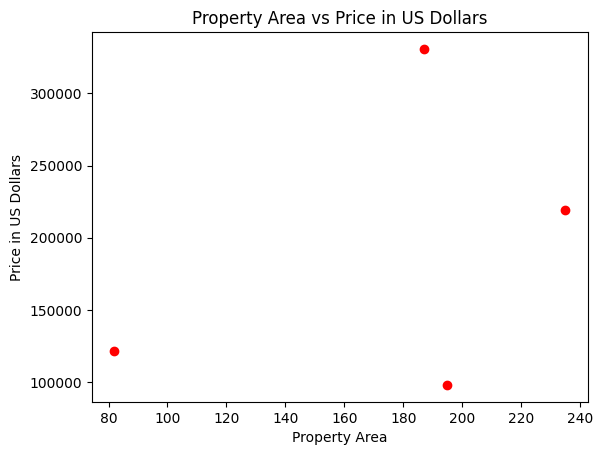

In [30]:
df1 = pd.read_csv("../data/mexico-city-real-estate-2.csv", usecols=["area_m2", "price_usd"])
plt.scatter(df1["area_m2"], df1["price_usd"], color="r")
plt.xlabel("Property Area")
plt.ylabel("Price in US Dollars")
plt.title("Property Area vs Price in US Dollars");

You may have noticed that there are lots of data points here, which makes it difficult to see if there's really a trend going on. This issue is called **over-plotting**, and it's very common in large datasets.

One solution to over-plotting is to use the `df.sample` method to select a random sample from the dataset. In the example below, note that the `frac=0.50` indicates that the random sample will consist of 50% of the data points in the set.

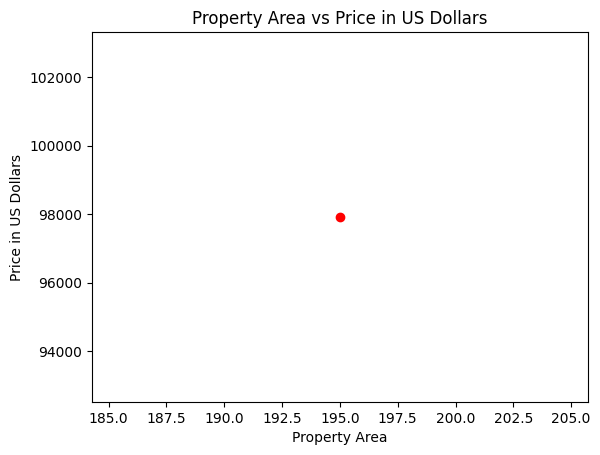

In [32]:
df3 = pd.read_csv("../data/mexico-city-real-estate-2.csv", usecols=["area_m2", "price_usd"])
df4 = df3.sample(frac=0.50, replace=True, random_state=1)
plt.scatter(df4["area_m2"], df4["price_usd"], color="r")
plt.xlabel("Property Area")
plt.ylabel("Price in US Dollars")
plt.title("Property Area vs Price in US Dollars");

That looks better, but things are still a little muddled. Let's try for a random sample that only looks at 25% of the data.

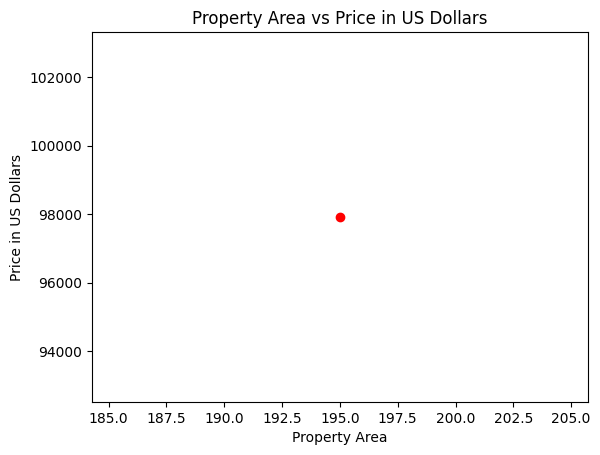

In [33]:
df4 = df3.sample(frac=0.25, replace=True, random_state=1)
plt.scatter(df4["area_m2"], df4["price_usd"], color="r")
plt.xlabel("Property Area")
plt.ylabel("Price in US Dollars")
plt.title("Property Area vs Price in US Dollars");

With the data as broadly scattered as this, it's unlikely that the two variables share a strong positive correlation, but let's calculate the **correlation coefficient,** just to be sure. 

To do that, we'll go back to the full dataset, and use the `corr` method. The code looks like this:

In [35]:
df = pd.read_csv("../data/mexico-city-real-estate-2.csv", usecols=["area_m2", "price_usd"])
area_m2 = df["area_m2"]
price_usd = df["price_usd"]
correlation = area_m2.corr(price_usd)
print(correlation)

0.3836815889817714


# Add a vertical or horizontal line across a plot
Vertical lines can be added to an existing plot in Matplotlib using `plt.axvline`. For this example, we'll add a vertical line using the scatter plot created in the previous step:


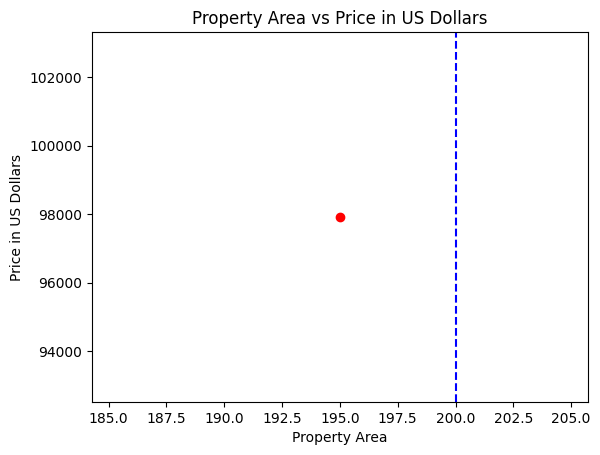

In [37]:
plt.scatter(df4["area_m2"], df4["price_usd"], color="r")
plt.axvline(200, linestyle="--", color="blue", label="Line Title")
plt.xlabel("Property Area")
plt.ylabel("Price in US Dollars")
plt.title("Property Area vs Price in US Dollars");

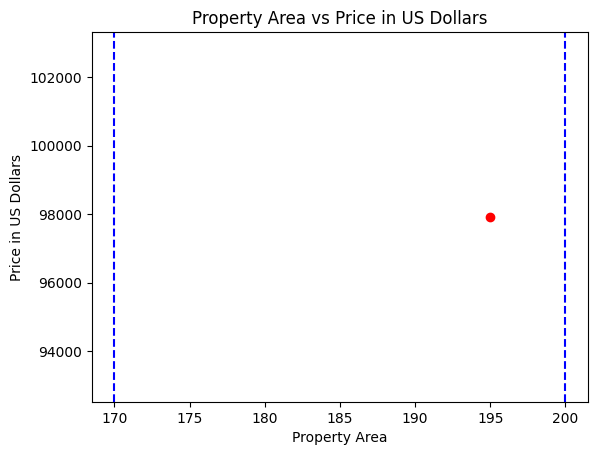

In [40]:
# Remove {
plt.scatter(df4["area_m2"], df4["price_usd"], color="r")
plt.axvline(170, linestyle="--", color="blue", label="Line Title")
plt.axvline(200, linestyle="--", color="blue", label="Line Title")
plt.xlabel("Property Area")
plt.ylabel("Price in US Dollars")
plt.title("Property Area vs Price in US Dollars");
# Remove }